# Life Expectancy Datasets

In [112]:
# Dependencies and setup

import pandas as pd
import requests
import matplotlib.pyplot as plt

### Life Expectancy Dataset loaded and cleaned
#### Life_Exp_df

In [113]:
Life_Exp_Male_df = pd.read_csv('Resources/WHO Life Expectancy Male.csv')
Life_Exp_Female_df = pd.read_csv('Resources/WHO Life Expectancy Female.csv')

# Rows with little or no data were removed from CSV file, easier to do in Excel. 

# Columns need to be converted to row data
Life_Exp_Male_df = pd.melt(Life_Exp_Male_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Male')
Life_Exp_Female_df = pd.melt(Life_Exp_Female_df, id_vars = 'Country', var_name = 'Year', value_name = 'Life Expectancy Female')

# Merge Male / Female Data 
Life_Exp_df = pd.merge(Life_Exp_Male_df, Life_Exp_Female_df, on = ['Country', 'Year'])

# Reduce decimal places to 1
Life_Exp_df['Life Expectancy Male'] = Life_Exp_df['Life Expectancy Male'].round(1)
Life_Exp_df['Life Expectancy Female'] = Life_Exp_df['Life Expectancy Female'].round(1)

Life_Exp_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female
0,Aruba,1960,61,68
1,Africa Eastern and Southern,1960,42,46
2,Afghanistan,1960,32,33
3,Africa Western and Central,1960,36,39
4,Angola,1960,37,40


### Population Dataset loaded and cleaned
#### Population_df
#### All_Data_df

In [114]:
Population_df = pd.read_csv('Resources/WHO Population.csv')

# Columns need to be converted to row data
Population_df = pd.melt(Population_df, id_vars = 'Country', var_name = 'Year', value_name = 'Population')

# Merge Population with Main dataset
All_Data_df = pd.merge(Life_Exp_df, Population_df,on = ['Country', 'Year'])

All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population
0,Aruba,1960,61,68,54608
1,Africa Eastern and Southern,1960,42,46,130692579
2,Afghanistan,1960,32,33,8622466
3,Africa Western and Central,1960,36,39,97256290
4,Angola,1960,37,40,5357195


### Territory (in Sq Kilometers) loaded and cleaned
#### Territory_df
#### All_Data_df

In [115]:
Territory_df = pd.read_csv('Resources/WB Square km.csv')

All_Data_df = pd.merge(All_Data_df, Territory_df, on=['Country'], how='left')
All_Data_df.fillna('', inplace = True)
All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km
0,Aruba,1960,61,68,54608,180
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123"
2,Afghanistan,1960,32,33,8622466,"652,230"
3,Africa Western and Central,1960,36,39,97256290,"9,045,773"
4,Angola,1960,37,40,5357195,"1,246,700"


### GDP Dataset loaded and cleaned
#### GDP_df
#### All_Data_df

In [116]:
GDP_df = pd.read_csv('Resources/WHO GDP.csv')

# Columns need to be converted to row data
GDP_df = pd.melt(GDP_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP')

# Change any NaN values to ""
GDP_df.fillna('', inplace = True)

pd.set_option('display.float_format', '{:,.0f}'.format)

GDP_df.head()

,Country,Year,GDP
0,Aruba,1960,
1,Africa Eastern and Southern,1960,"21,125,015,452"
2,Africa Western and Central,1960,"10,447,637,853"
3,Angola,1960,
4,Albania,1960,


In [117]:
All_Data_df = pd.merge(All_Data_df, GDP_df, on=['Country', 'Year'], how='left')

# Change any NaN values to ""
All_Data_df.fillna('', inplace = True)
All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP
0,Aruba,1960,61,68,54608,180,
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452"
2,Afghanistan,1960,32,33,8622466,"652,230",
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853"
4,Angola,1960,37,40,5357195,"1,246,700",


### OECD GDP Growth Dataset loaded and cleaned
#### GDP_Growth_df
#### All_Data_df

In [118]:
# Load data into dataframe
GDP_Growth_df = pd.read_csv('Resources/OECD GDP Growth Data.csv')

# Replace all 'no data' cells wth ' '
GDP_Growth_df.replace('no data', '', inplace=True)
GDP_Growth_df.fillna('', inplace = True)

# Reshape the GDP_Growth_df so that years are listed in rows instead of columns
GDP_Growth_df = pd.melt(GDP_Growth_df, id_vars = 'Country', var_name = 'Year', value_name = 'GDP Growth %')

GDP_Growth_df.head()

,Country,Year,GDP Growth %
0,Afghanistan,1980,
1,Albania,1980,2.7
2,Algeria,1980,-5.4
3,Andorra,1980,
4,Angola,1980,2.4


In [119]:
All_Data_df = pd.merge(All_Data_df, GDP_Growth_df, on = ['Country', 'Year'], how='left')
All_Data_df.fillna('', inplace = True)
All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP,GDP Growth %
0,Aruba,1960,61,68,54608,180,,
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452",
2,Afghanistan,1960,32,33,8622466,"652,230",,
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853",
4,Angola,1960,37,40,5357195,"1,246,700",,


### Clean Water loaded and cleaned
#### Clean_Water_df
#### All_Data_df

In [120]:
Clean_Water_df = pd.read_csv('Resources/WHO Access to Clean Water.csv')
Clean_Water_df.head()

Clean_Water_df = pd.melt(Clean_Water_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Clean Water')

Clean_Water_df.head()

,Country,Year,% Population with Clean Water
0,Afghanistan,2000,11
1,Africa Western and Central,2000,15
2,Albania,2000,49
3,Andorra,2000,91
4,Armenia,2000,80


In [121]:
Clean_Water_df['Country'].nunique()

145

In [122]:
All_Data_df = pd.merge(All_Data_df, Clean_Water_df, on = ['Country', 'Year'], how='left')
All_Data_df.fillna('', inplace = True)
All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP,GDP Growth %,% Population with Clean Water
0,Aruba,1960,61,68,54608,180,,,
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452",,
2,Afghanistan,1960,32,33,8622466,"652,230",,,
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853",,
4,Angola,1960,37,40,5357195,"1,246,700",,,


### Sanitation loaded and cleaned
#### Sanitation_df
#### All_Data_df

In [123]:
Sanitation_df = pd.read_csv('Resources/WHO Access to Sanitation.csv')

Sanitation_df = pd.melt(Sanitation_df, id_vars = 'Country', var_name = 'Year', value_name = '% Population with Sanitation')

Sanitation_df.head()

,Country,Year,% Population with Sanitation
0,Africa Western and Central,2000,16
1,Albania,2000,40
2,Andorra,2000,15
3,Arab World,2000,39
4,United Arab Emirates,2000,NaN


In [124]:
All_Data_df = pd.merge(All_Data_df, Sanitation_df, on=['Country', 'Year'], how='left')
# Change any NaN values to ""
All_Data_df.fillna('', inplace = True)
All_Data_df.head()

,Country,Year,Life Expectancy Male,Life Expectancy Female,Population,Square km,GDP,GDP Growth %,% Population with Clean Water,% Population with Sanitation
0,Aruba,1960,61,68,54608,180,,,,
1,Africa Eastern and Southern,1960,42,46,130692579,"14,845,123","21,125,015,452",,,
2,Afghanistan,1960,32,33,8622466,"652,230",,,,
3,Africa Western and Central,1960,36,39,97256290,"9,045,773","10,447,637,853",,,
4,Angola,1960,37,40,5357195,"1,246,700",,,,


# Life Expectancy Visualizations

### Line Chart showing life expectancy over time

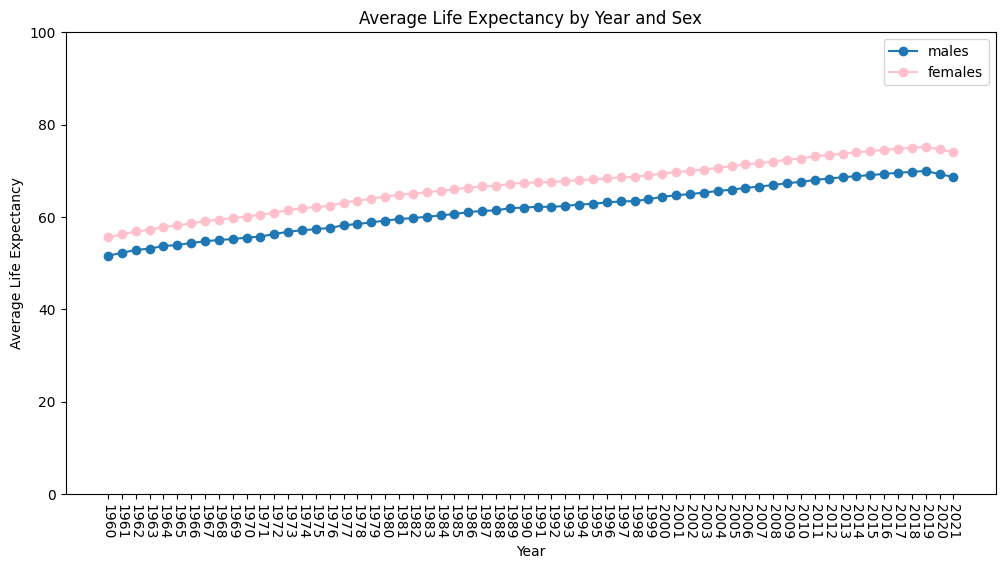

In [134]:
# non-numeric values need to be coerced
Life_Exp_df['Life Expectancy Male'] = pd.to_numeric(Life_Exp_df['Life Expectancy Male'], errors='coerce')
Life_Exp_df['Life Expectancy Female'] = pd.to_numeric(Life_Exp_df['Life Expectancy Female'], errors='coerce')

m_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']
f_df = Life_Exp_df[Life_Exp_df['Year'] != '2022']

# Grouping by 'Year' and 'Status' and calculating average life expectancy
m_grouped_df = m_df.groupby(['Year'])['Life Expectancy Male'].mean().reset_index()
f_grouped_df = f_df.groupby(['Year'])['Life Expectancy Female'].mean().reset_index()

# Creating the line chart
plt.figure(figsize =(12, 6))  

# Line plot for Males
plt.plot(m_grouped_df['Year'], m_grouped_df['Life Expectancy Male'], label='males', marker='o')

# Line plot for Females
plt.plot(f_grouped_df['Year'], f_grouped_df['Life Expectancy Female'], label='females', marker='o', color='pink')

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Year and Sex')
plt.ylim(0, 100)
plt.legend()
plt.xticks(rotation=-90) 

plt.show()

In [126]:
m_grouped_df['Life Expectancy Male'].dtype

dtype('float64')

### Scatter Plot showing Life Expectancy vs. Population

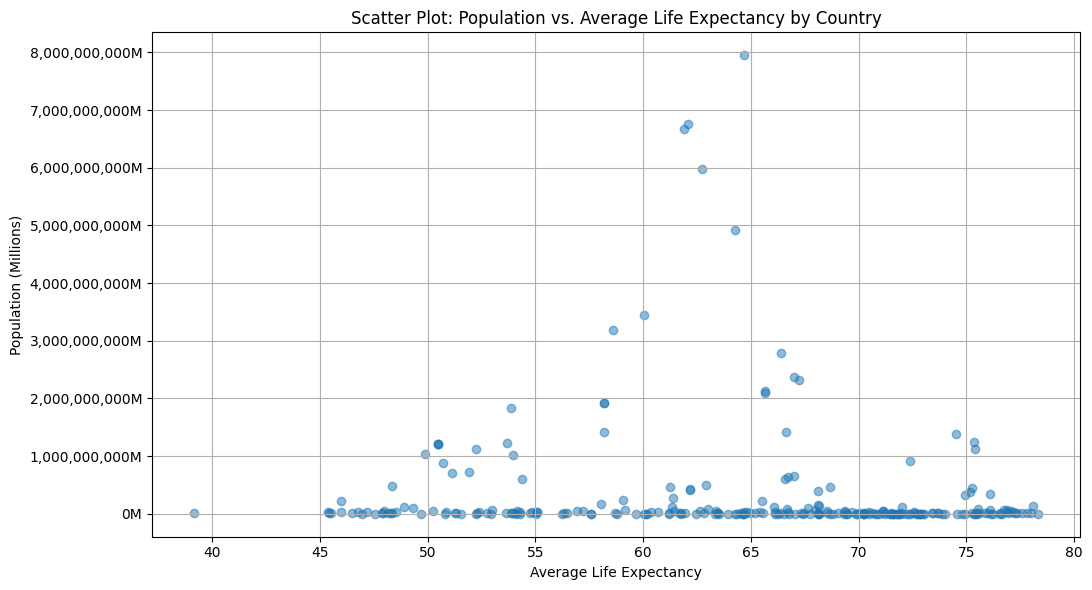

In [152]:
# Convert 'Life Expectancy Male' and 'Life Expectancy Female' columns to numeric, replacing empty strings with NaN
All_Data_df['Life Expectancy Male'] = pd.to_numeric(All_Data_df['Life Expectancy Male'], errors='coerce')
All_Data_df['Life Expectancy Female'] = pd.to_numeric(All_Data_df['Life Expectancy Female'], errors='coerce')

# Calculate the average life expectancy by averaging 'Life Expectancy Male' and 'Life Expectancy Female' columns
All_Data_df['Average Life Expectancy'] = (All_Data_df['Life Expectancy Male'] + All_Data_df['Life Expectancy Female']) / 2

# Group by 'Country' and calculate the average 'Average Life Expectancy' and total 'Population'
grouped_df = All_Data_df.groupby('Country').agg({
    'Average Life Expectancy': 'mean',
    'Population': 'max'
}).reset_index()

# Remove rows with NaN values (if any) after calculating the average
grouped_df = grouped_df.dropna()

# Reverse the x and y-axis data
x = grouped_df['Average Life Expectancy']
y = grouped_df['Population']

# Convert population values to millions for labeling
y_labels_millions = [val / 1e6 for val in y]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

plt.xlabel('Average Life Expectancy')
plt.ylabel('Population (Millions)')
plt.title('Scatter Plot: Population vs. Average Life Expectancy by Country')

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()




In [138]:
Outliers_df = grouped_df[Life_Exp_df['Population'] > 40000000]
Outliers_df

KeyError: 'Population'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming you have a DataFrame named 'Life_Exp_Report_df' with columns 'Country', 'BMI', and 'Life Expectancy'

# Calculate average BMI and Life Expectancy grouped by 'Country'
avg_data = Life_Exp_Report_df.groupby('Country').mean([['BMI', 'Life Expectancy']])

x_avg = avg_data['BMI']
y_avg = avg_data['Life Expectancy']

plt.figure(figsize=(10, 6))  
plt.scatter(x_avg, y_avg, alpha=0.5)  

plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot: Average BMI vs. Average Life Expectancy by Country')

# Calculate the linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_avg, y_avg)

# Create the linear regression line using the calculated slope and intercept
regression_line = slope * x_avg + intercept

# Plot the linear regression line
plt.plot(x_avg, regression_line, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

# Format y-axis labels to display population in millions (if needed)
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.show()

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load the built-in world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Generate sample data for visualization
data = {
    'country': ['United States', 'Canada', 'Mexico'],
    'gdp_value': ['United States', 'Canada', 'Mexico']
}
gdp_df = pd.DataFrame(data)
# Merge GeoDataFrame with DataFrame based on country names
merged_gdf = world.merge(gdp_df, left_on='name', right_on='country', how='left')
# Set up the figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
# Plot the choropleth map
merged_gdf.plot(column='gdp_value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Customize the plot (optional)
ax.set_title('World GDP Choropleth Map')
ax.axis('off')
# Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
# Load the built-in world dataset from geopandas
world = gpd.read_file(gpd.datasets.get_path(' '))
# Generate sample data for visualization
data = {
    'country': ['United States', 'Canada', 'Mexico'],
    'gdp_value': ['United States', 'Canada', 'Mexico']
}
gdp_df = pd.DataFrame(data)
# Merge GeoDataFrame with DataFrame based on country names
merged_gdf = world.merge(gdp_df, left_on='name', right_on='country', how='left')
# Set up the figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))
# Plot the choropleth map
merged_gdf.plot(column='gdp_value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
# Customize the plot (optional)
ax.set_title('World GDP Choropleth Map')
ax.axis('off')
# Show the plot
plt.show()